# M2:  Basic Graphing Assignment -- S. Mada
Initial code chunk imports libraries and sets working directory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pylab as plb

os.chdir('c:\\users\shann\desktop\cbadatasets')


### Question 1
 
* Do Opioid overdoes tend to be associated with less affluent areas -- that is, areas where families have lower incomes?
 
* Some people who start with opiod addictions are reported to transition to heroin use.  What is the relationship in Virginia counties between opiod overdoes and heroin overdoes?

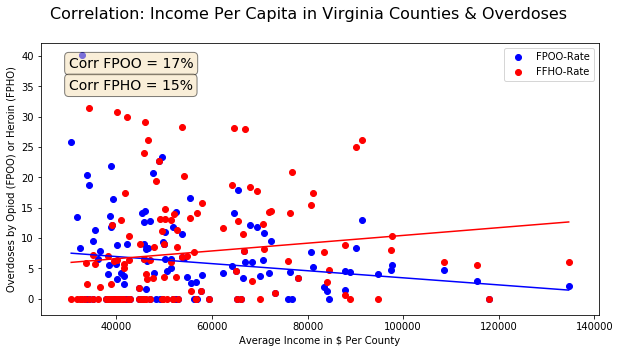

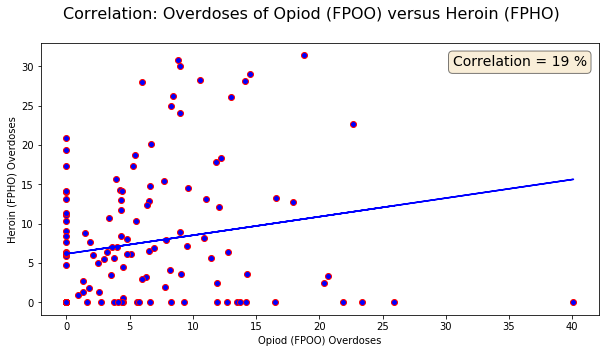

In [18]:
data=pd.read_csv('OpidsVA.csv', delimiter=',')
data.sort_values(["MedianHouseholdIncome"], axis=0, ascending=True, inplace=True)   # sort counties by income
#data=data.head(45)                                                                  # cut down the data
import math

# Graph Type: Scatter plots show how much one variable is affected by another -- the correlation.

# Load the Data and compute linear regression lines.

x=data["MedianHouseholdIncome"]
y1=data["FPOO-Rate"]
y2=data["FFHO-Rate"]

z1=np.polyfit(x,y1,1)
z2=np.polyfit(x,y2,1)

FPOOfit=np.poly1d(z1)  # create a regression line
FPHOfit=np.poly1d(z2)  # create aregression line

# Calculate the Correlation

corrFPOO=np.corrcoef(x,y1)*100
corrFPHO=np.corrcoef(x,y2)*100

corrFPOO=math.trunc(abs(round(corrFPOO[0,1]))) # tidy up the format
corrFPHO=math.trunc(abs(round(corrFPHO[0,1])))

# Prepare text for graph annotation

string1=('Corr FPOO = ' + str(corrFPOO) + '%')
string2=('Corr FPHO = ' + str(corrFPHO) + '%')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


# Produce the first Graph and Annotations

fig, p1=plt.subplots()
p1.scatter(x,y1,color='b') 
p1.scatter(x,y2,color='r')

plb.plot(x, FPOOfit(x), 'm-', color='b')
plb.plot(x, FPHOfit(x), 'm-', color='r')

plt.suptitle('Correlation: Income Per Capita in Virginia Counties & Overdoses ', size=16)
p1.set_xlabel('Average Income in $ Per County')
p1.set_ylabel('Overdoses by Opiod (FPOO) or Heroin (FPHO)')

p1.text(0.05, 0.95, string1, transform=p1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
p1.text(0.05, 0.87, string2, transform=p1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


p1.legend(loc=1)

plt.gcf().set_size_inches(10,5)

# Prepare Data for the second graph


x=data["FPOO-Rate"]
y=data["FFHO-Rate"]

fig, p2=plt.subplots()

p2.scatter(x,y, color='b', edgecolors='r')  # changed color, distinguish from first graph

z1=np.polyfit(x,y,1)


# Calculate Basic Correlation

corrboth=np.corrcoef(x,y)*100
corrboth=math.trunc(round(corrboth[0,1],0))


# Prepare text for graph annotation

textstr = ('Correlation = ' + str(corrboth) + ' %')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


# Create a Graph
corrline=np.poly1d(z1)
p2.plot(x, corrline(x), 'm-', color='b')

plt.suptitle('Correlation: Overdoses of Opiod (FPOO) versus Heroin (FPHO)', size=16)
p2.set_xlabel('Opiod (FPOO) Overdoses')
p2.set_ylabel('Heroin (FPHO) Overdoses')

p2.text(0.65, 0.93, textstr, transform=p1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.gcf().set_size_inches(10,5)






The first graph above depicts the correlation between overdoses and county average income per capita in Virginia for Opiods and Heroin.  There is weak correlation in the decrease in Opiod overdoses with rising income.  A similar slight correlation (increase) is shown with Heroin.

The second graph depicts the correlation between Opiod and Heroin overdoses and shows a slightly stronger correlation between the two with a 19% correlation.

Both analyses test only linear fit and basic correlation.  Visually the correlation appears stronger than the linear fit suggesting there may be a non linear model that is a better fit.   There are clearly fewer occurrence of overdoses in higher income counties and there is a visible cluster of low to low overdoses between Opiods and Heroin.


### Question 2

* Which states are associated with the greatest number of United States presidents in terms of the president's birthplaces?

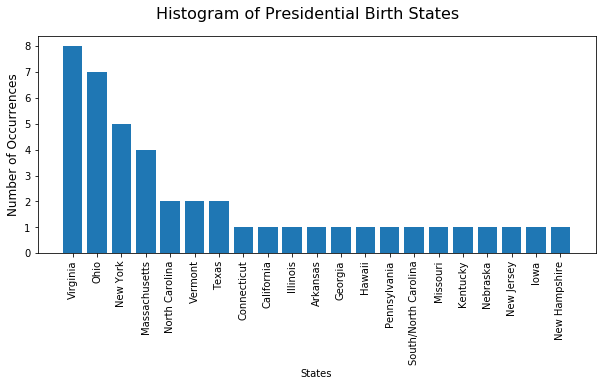

In [11]:
import operator                  # introduced in the python pre-requisite class, code is reused from M5 Module

data=pd.read_csv('presidents.csv', delimiter=',')
states=data["State"]             # Extract just the data of interest
uniquestates=list(set(states))   # Create lists of unique states represented
bins={uniquestates:0 for uniquestates in uniquestates} # Create bins for counting
for uniquestates in states:                            # Tally up the states
    bins[uniquestates]+=1
sorted_bins=dict(sorted(bins.items(), key=operator.itemgetter(1), reverse=True))  # Sort in descending order

x=list(sorted_bins.keys())
y=list(sorted_bins.values())


# Graph type -- Histograms show frequency counts by type, key to the question of "greatest number"

# Plot the hisgoram, set ticks, label axes, add title, set size of plot

plt.bar(range(len(y)), y, align="center")
plt.xticks(range(len(x)), x, rotation='vertical')
plt.xlabel('States')    # states is obvious, but rubric requires a label
plt.ylabel('Number of Occurrences', size=12)
plt.suptitle('Histogram of Presidential Birth States', size=16)

plt.gcf().set_size_inches(10,4)


US Presidents have been born in a total of 21 states.  Eight US presidents have been born in Virginia, followed by 7 in Ohio, 5 in New York, and 4 in Massachusetts.  
              



### Question 3

How have vehicle sales in the United States varied over time?

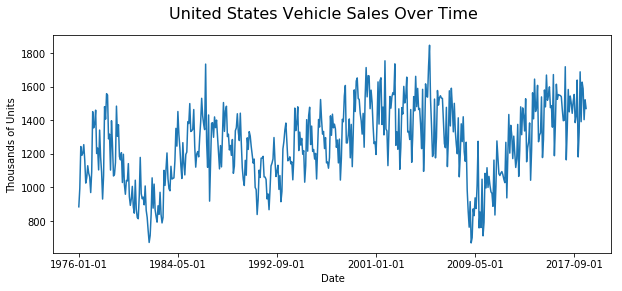

In [4]:
import matplotlib.ticker as ticker                # Enables control of ticks for neat appearance

# Graph Type -- Trend lines show how a data element changes over time, key to the question of "variance"

data=pd.read_csv('TOTALNSA.csv', delimiter=',')
x=data['DATE']
y=data['TOTALNSA']
fig, ax=plt.subplots(figsize=(8,4))
ax.set_xlabel('Date')                             # Date is obvious, but rubric requires a label
ax.set_ylabel('Thousands of Units')               # Researched vehicle sales data to understand units
ax.plot(x, y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))    # Provides Readability
plt.suptitle('United States Vehicle Sales Over Time', size=16)

plt.gcf().set_size_inches(10,4)


Vehicle sales in the United States appear to follow general economic upturns and downturns as evidenced by the trend chart above which dips in line with times of recession and rises with market recovery.  One can see a downward trajectory through the late 70's, followed by a rise through the boom of the 80's and again a downward trend in the 90's.  This is followed by a rise through the "dot.com" expansion of the early 2000's with a significant downward spike appearing near the market contraction of 2007.  

